# Import required Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Read data

In [108]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [109]:
df.columns = ['age',
             'sex',
             'cp',
             'restbps',
             'chol',
             'fbs',
             'restecg',
             'thalach',
             'exang',
             'oldpeak',
             'slope',
             'ca',
             'thal',
             'hd']
df.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Identify and deal with missing values

In [110]:
df.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [111]:
df.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [112]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [113]:
len(df.loc[(df['thal']=='?') | (df['ca']=='?')])

6

In [114]:
df.loc[(df['thal'] == '?')  | (df['ca']=='?')]

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [115]:
df.shape

(303, 14)

In [116]:
#Since i have few, deleted these rows
df_no_missing = df.loc[(df['thal']!='?') &(df['ca']!='?')]

In [117]:
df_no_missing.shape

(297, 14)

In [118]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [119]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [120]:
X = df_no_missing.iloc[:,:-1]
y = df_no_missing['hd'].copy()

In [121]:
X.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [122]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [123]:
X.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [124]:
X.cp.unique()

array([1., 4., 3., 2.])

# Format data with Decision Tree with One hot Encoding

In [125]:
pd.get_dummies(X, columns =['cp']).head()

,age,sex,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [126]:
#detour from main prog(only this box. Checking the usage of ColumnTransformer() and Pipeline()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(transformers = [('cat',OneHotEncoder(),['cp','thal','restecg','slope'])])
clf = Pipeline(steps = [('Pre Processor', preprocessor),
                        ('Classifier', DecisionTreeClassifier())] )
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, random_state=42)
clf.fit(x1_train, y1_train)
print(clf.score(x1_test, y1_test))

0.5866666666666667


In [127]:
X_encoded = pd.get_dummies(X, columns = ['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [128]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [129]:
y_not_zero = y>0
y[y_not_zero] = 1
y.unique()

array([0, 1], dtype=int64)

# Build a priliminary Decision Tree for Classification

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42 )
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)


In [135]:
clf_dt.ccp_alpha

0.0

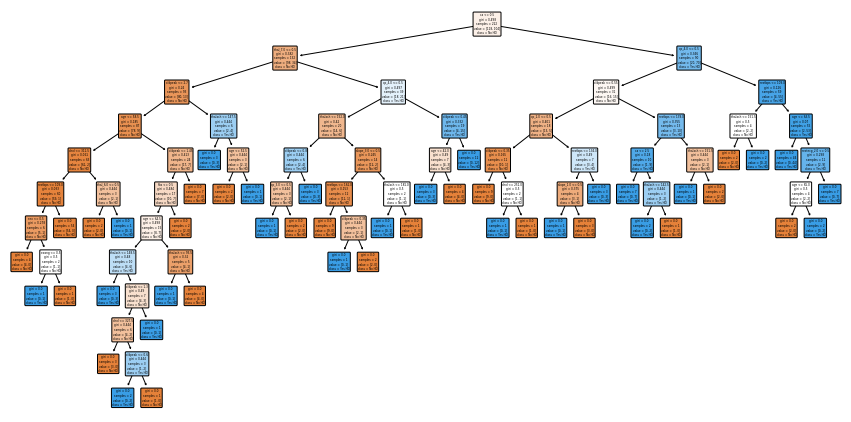

In [131]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,filled = True, rounded=True, class_names=['No HD', 'Yes HD'], feature_names = X_encoded.columns)
plt.show()

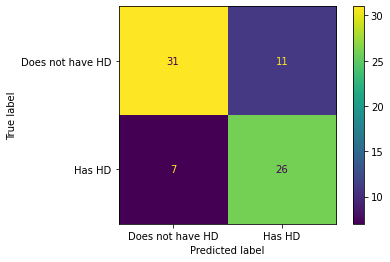

In [132]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['Does not have HD', 'Has HD'])

In [133]:
print(clf_dt.score(X_test, y_test))


0.76


# Cost Complexity Pruning : Visualize alpha

In [80]:
#Visualize and find alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

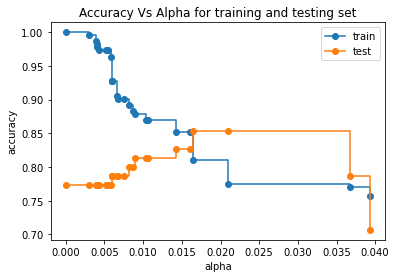

In [81]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy Vs Alpha for training and testing set')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

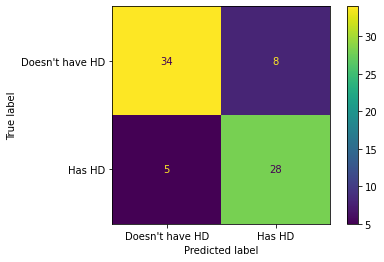

In [139]:
#test dataset has its maximum when alpha = 0.016
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
clf = clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test, display_labels=["Doesn't have HD", 'Has HD'])
plt.show()

# Cross validation to find ideal alpha

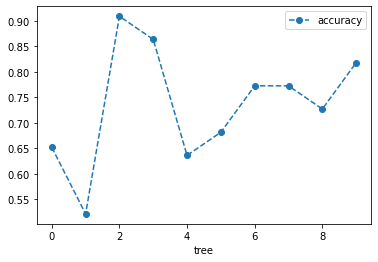

In [84]:
#Cross validation for finding best alpha
clf_dt = DecisionTreeClassifier(random_state= 42, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv= 10)
df= pd.DataFrame(data={'tree':range(10), 'accuracy':scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')
plt.show()

In [85]:
#Using different Training and Testing data with same alpha resulted in different accuracies.
#alpha is sensitive to datasets
#So instead of picking single train and test datasets let's use cross validation to find best alpha

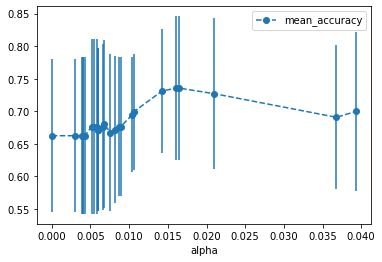

In [138]:
alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train,  cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy','std'])

alpha_results.plot(x='alpha', y='mean_accuracy',yerr='std', marker='o', linestyle='--')
plt.show()

In [96]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.012) & (alpha_results['alpha']<0.015)]['alpha']

In [98]:
ideal_ccp_alpha=float(ideal_ccp_alpha)

# Build, Evaluate, Draw and interpret Decision Tree

In [100]:
##Building, evaluating, drawing and interpreting the final classification tree
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

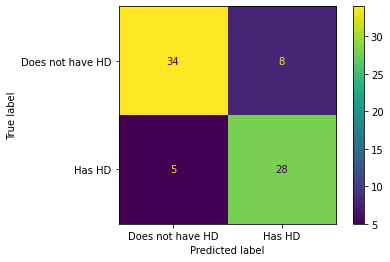

In [101]:
plot_confusion_matrix(clf_dt_pruned,X_test, y_test, display_labels=['Does not have HD', 'Has HD'])
plt.show()

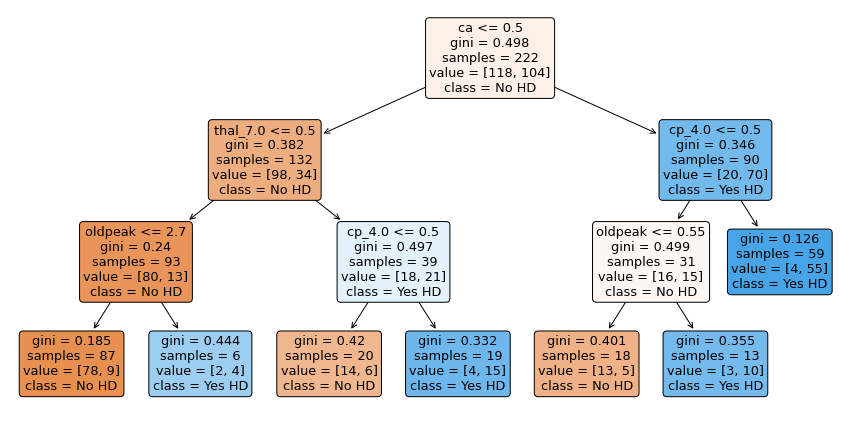

In [105]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=['No HD', 'Yes HD'], feature_names=X_encoded.columns)
plt.show()